## 1. Introduction

You may have discovered that the data of "HPA" (training set) is little different from the data of "Hubmap" (test set). Not just pixel_size and img_height, their color is dissimilar because of the difference of stain protocols. It is a very common problem when you handle histopathology images from different datasets.

In this notebook, I want to share a "Vahadane" stain normalization method for H&E stained histopathology images, but I am not sure it works in this dataset. 

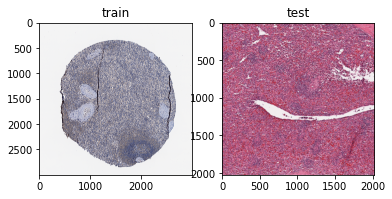

In [1]:
from skimage import io
import matplotlib.pyplot as plt
train_img = io.imread('/kaggle/input/hubmap-organ-segmentation/train_images/10392.tiff')
test_img = io.imread("/kaggle/input/hubmap-organ-segmentation/test_images/10078.tiff")
plt.subplot(121)
plt.title("train")
plt.imshow(train_img)
plt.subplot(122)
plt.title('test')
plt.imshow(test_img)

## 2 Implement

If you prefer to know more theoretical thing about stain normalization, I recommend this [paper](https://ieeexplore.ieee.org/abstract/document/7460968) and the [intelligible version](https://hackmd.io/@peter554/staintools)

In [2]:
!pip install staintools
!pip install spams

  Preparing metadata (setup.py) ... - done
  Created wheel for staintools: filename=staintools-2.1.2-py3-none-any.whl size=14075 sha256=ee5d749ec26b5aa3aa9cddb47e08469397dee11443b3a152abbcdc2fa110933a
  Stored in directory: /root/.cache/pip/wheels/9b/ed/74/9d36d40854e911d8e2d2d28d7b67e37e9f176f913ecf34f813
Successfully built staintools
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 6.0 MB/s eta 0:00:00
  Installing build dependencies ... - \ | / - \ | / - \ done
  Getting requirements to build wheel ... - done
  Preparing metadata (pyproject.toml) ... - done
  Created wheel for spams: filename=spams-2.6.5.4-cp37-cp37m-linux_x86_64.whl size=4693777 sha256=cc5d6fae0d16f5378ec9142a365ed11671dcfbf8bdc0e7e0196b5c6d526c2b80
  Stored in directory: /root/.cache/pip/wheels/5e/92/17/e718e0e26bfcdd7e81afcf874ac2bc599dd7dd7f3ad78f9d76
Successfully built spams


In [3]:
!mkdir transform1
!mkdir transform2

351it [2:27:03, 25.14s/it]


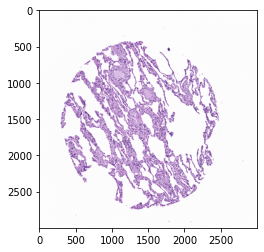

In [4]:
import staintools
import os
from tqdm import tqdm

target = staintools.read_image("/kaggle/input/hubmap-stain-pictures/0486052bb_0204.png")
target = staintools.LuminosityStandardizer.standardize(target)
normalizer = staintools.StainNormalizer(method='vahadane')
normalizer.fit(target)
train_list = os.listdir('../input/hubmap-organ-segmentation/train_images')
for idx, train_image in tqdm(enumerate(train_list)):
    to_transform = staintools.read_image(f"/kaggle/input/hubmap-organ-segmentation/train_images/{train_image}")
    # Standardize brightness (optional, can improve the tissue mask calculation)
    to_transform = staintools.LuminosityStandardizer.standardize(to_transform)
    # Stain normalize
    transformed1 = normalizer.transform(to_transform)
    train_image = train_image.replace('tiff', 'png')
    io.imsave(f'./transform1/{train_image}', transformed1)
    if idx<10: plt.imshow(transformed1)

Not too bad, is it? However, I am not a pathologist so can not judge it.

In [5]:
# # another approach

# target = staintools.read_image("/kaggle/input/hubmap-organ-segmentation/test_images/10078.tiff")
# target = staintools.LuminosityStandardizer.standardize(target)
# normalizer = staintools.StainNormalizer(method='macenko')
# normalizer.fit(target)
# train_list = os.listdir('../input/hubmap-organ-segmentation/train_images')
# for idx, train_image in tqdm(enumerate(train_list)):
#     to_transform = staintools.read_image(f"/kaggle/input/hubmap-organ-segmentation/train_images/{train_image}")
#     # Standardize brightness (optional, can improve the tissue mask calculation)
#     to_transform = staintools.LuminosityStandardizer.standardize(to_transform)
#     # Stain normalize
#     transformed2 = normalizer.transform(to_transform)
#     train_image = train_image.replace('tiff', 'png')
#     io.imsave(f'./transform1/{train_image}', transformed2)
    
#     if idx<10: plt.imshow(transformed2)

### 3. Analysis

In [6]:
# import pandas as pd
# import os
# import numpy as np

# def rle2mask(mask_rle, shape):
#     s = mask_rle.split()
#     starts, lengths = [
#         np.asarray(x, dtype=int) for x in (s[0:][::2], s[1:][::2])
#     ]
#     starts -= 1
#     ends = starts + lengths
#     img = np.zeros(shape[0] * shape[1], dtype=np.uint8)
#     for lo, hi in zip(starts, ends):
#         img[lo : hi] = 1
#     return img.reshape(shape).T

# train_df = pd.read_csv(os.path.join('/kaggle/input/hubmap-organ-segmentation', "train.csv"))

# mask_10392 = rle2mask(train_df[train_df["id"]==10392]['rle'].values[0], (3000, 3000))

In [7]:
# plt.figure(dpi=400)
# plt.subplot(121)
# plt.imshow(transformed1)
# plt.subplot(122)
# plt.imshow(mask_10392, cmap='gray')

It is quite clear that tumor regions are darker. 

In [8]:
# # we can also transfer test set to training set

# to_transform = staintools.read_image("/kaggle/input/hubmap-organ-segmentation/test_images/10078.tiff")
# target = staintools.read_image("/kaggle/input/hubmap-organ-segmentation/train_images/10392.tiff")

# # Standardize brightness (optional, can improve the tissue mask calculation)
# target = staintools.LuminosityStandardizer.standardize(target)
# to_transform = staintools.LuminosityStandardizer.standardize(to_transform)

# # Stain normalize
# normalizer = staintools.StainNormalizer(method='vahadane')
# normalizer.fit(target)
# transformed3 = normalizer.transform(to_transform)
# plt.imshow(transformed3)